In [2]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy.linalg import inv

$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\N}{\mathbb{N}}$

#  TP 4 : Schémas numériques  pour les EDO

L'objectif de ce TP est de mettre en oeuvre différents schémas numériques pour approcher la solution d'une équation différentielle ordinaire. Nous allons considérer différents schémas numériques, dont certains  nous n'avons pas encore vus en cours. L'objectif est de comprendre ce que c'est une solution approchée donnée par une méthode numérique, mais aussi de comprendre des notions comme l' erreur entre la solution exacte et la solution approchée, la  convergence d'une méthode numérique et l' ordre de précision d'une méthode numérique



Dans ce TP on considère des équations différentielles ordinaires, ou des systèmes d'équations différentielles ordinaires, de la forme
\begin{equation}
\label{EDO}
\left\{\begin{aligned}
  y'(t) & =  f(t,y(t)), \\
  y(t_0) & =  y_0,
\end{aligned} \right.
\tag{EDO}
\end{equation}

où $f$ : $I \times \R^n \longrightarrow \R^n$ est une
fonction dans les conditions du théorème de Cauchy-Lipschitz, avec $I\subseteq\R$ un intervalle ouvert de $\R$ et où $(t_0,y_0)\in I\times\R^n$ est donné. Le problème de Cauchy (EDO) admet alors une unique solution maximale définie dans un intervalle ouvert $J\subseteq I$.


On souhaite calculer une solution approchée de ce problème dans un intervalle de la forme $[t_0,t_f]=[t_0,t_0+T]\subseteq J$, avec $T>0$. Pour ce faire, on se donne $N\in\N$ et on considère une discrétisation de $[t_0,t_0+T]$ de pas $h=\frac TN,$ donnée par les points 
$$
t_0< t_1< \cdots <t_N=t_0+T,\ \ \ t_n=nh,\ n=0,\dots,N,
$$
et l'on utilise un schéma numérique afin de calculer une approximation $y^n$ de $y(t_n)$ pour $n=0,\dots,N$. 

Les schémas qui suivent sont fréquemment utilisés pour discrétiser le problème (EDO). On pose $y^0=y_0,\,$ et, pour $n=0,\dots,N-1,$ 



- **Euler explicite** :   $y^{n+1}=y^{n}+h f(t_n,y^{n})$ où   $f^{n}=f(t_n,y^{n})$ ;


- **Euler implicite** :   $y^{n+1}=y^{n}+h f(t_{n+1},y^{n+1})$ où $f^{n+1}=f(t_{n+1},y^{n+1})$ ;


-  **Heun** :  $y^{n+1}=y^{n}+\frac{h}{2}\big(f(t_n,y^{n})+f\big(t_n+h,y^{n}+h f(t_n,y^{n})\big)\big)$ où $p_1=f(t_n,y^{n})$ et $p_2=f(t_n+h,y^{n}+h p_1)$ ;


- **Crank-Nicolson** :  $y^{n+1}=y^{n}+\frac{h}{2}\big(f(t_{n},y^{n})+f(t_{n+1},y^{n+1})\big)$ où $f^{n}=f(t_{n},y^{n})$, $f^{n+1}=f(t_{n+1},y^{n+1})$ ;



- **Runge Kutta 4** :  $y^{n+1}=y^{n}+\frac{h}{6}(p_1+2p_2+2p_3+p_4)$ où $p_1=f(t_n,y^{n})$, $p_2=f(t_n+\frac{h}{2},y^{n}+\frac{h}{2} p_1)$, $p_3=f(t_n+\frac{h}{2},y^{n}+\frac{h}{2} p_2)$ et $p_4=f(t_n+h,y^{n}+h p_3)$.




### Exercice 1 : Méthodes implicites

On s'intéresse aux schémas de Euler implicite et de Crank-Nicolson.

 Considérons le problème 
$$
(P_1)\ \ \ \ 
\begin{cases}
\begin{cases}
x'=-y,\\
y'=x,
\end{cases}\\[4pt]
\ x(0)=1,\ \ y(0)=0, 
\end{cases}
$$
**Q1)** Sans déterminer la solution analytique de ce problème, montrer que sa trajectoire décrit un cercle, dont le centre est l'origine, dans le plan $(x,y)$.

*La trajectoire d'une solution $t\in J\mapsto(x(t),y(t))$ d'une EDO est la courbe
      $$
\{(x(t),y(t))\,|\,t\in J\}.
      $$*
      
**Q2)** Calculer les solutions approchées de $(P_1)$ données par le schéma d'Euler explicite, par le schéma d'Euler implicite et par le schéma de Crank-Nicolson, associées, à chaque fois, à des discrétisations de l'intervalle $[0,4 \pi]$ de 100, 200 et 400 points.

**Remarque :** dans le cas des schémas implicites (Euler implicite et Crank-Nicolson), il n'est pas possible de programmer une fonction à l'image des fonctions `Heun(fct, t0, tf, y0, h)` et `euler_exp(fct, t0, tf, y0, h)`. Comme le problème $(P_1)$ est linéaire, on peut expliciter la relation qui donne $(x^{n+1},y^{n+1})$ en fonction de $(x^n,y^n),$ pour les deux schémas. Dans le cas d'un problème non linéaire, l'explicitation des schémas implicites n'est pas toujours possible. Dans ce cas, pour programmer ces méthodes, il faut utiliser une méthode de résolution approchée d'équations non linéaires (comme par exemple la méthode de Newton) pour résoudre l'équation qui donne un terme en fonction du précédent.

In [5]:
def f1(y,t):
    return np.array([-y[1],y[0]])

t0=0
tf=4*np.pi
h=tf/100
Y0=np.array([1.,0])

# Fonction g définissant le schéma d'Euler implicite dans le cas du problème (P1)

def g_eul_imp_P1(Y,h) :
    x=Y[0]
    y=Y[1]
    d=1./(1+h**2)
    return np.array([d*(x-h*y),d*(y+h*x)])

# Fonction g définissant le schéma de CN dans le cas du problème (P1)

def g_CN_P1(Y,h):
    x=Y[0]
    y=Y[1]
    d=1./(1+(h**2)/4)
    dd=1-(h**2)/4
    return np.array([d*(dd*x-h*y),d*(dd*y+h*x)])
# REMARQUE : les fonctions qui suivent peuvent s'appliquer à n'importe quel problème pourvu qu'on explicite les schémas sous la forme Y^{n+1}=g(Y^n)


def euler_exp(f,t0,tf,y0,h):
    T=np.arange(t0,tf+h,h)    
    N=T.size
    y=np.zeros((N,y0.size))  
    y[0,:]=y0
    for n in range(N-1):
        y[n+1,:]=y[n,:]+h*f(y[n,:],T[n])
    return T,y

def euler_imp(g,t0,tf,y0,h):
    T=np.arange(t0,tf+h,h)    
    N=T.size
    Y=np.zeros((N,y0.size))
    Y[0,:]=y0
    for n in range(N-1):
        X=Y[n,:]
        Y[n+1,:]=g(X,h)
    return T,Y

def CN(g,t0,tf,y0,h):
    T=np.arange(t0,tf+h,h)    
    N=T.size
    Y=np.zeros((N,y0.size))
    Y[0,:]=y0
    for n in range(N-1):
        X=Y[n,:]
        Y[n+1,:]=g(X,h)
    return T,Y

Tee, Yee=euler_exp(f1,t0,tf,Y0,h)
Tei, Yei=euler_imp(g_eul_imp_P1,t0,tf,Y0,h)
TCN, YCN=CN(g_CN_P1,t0,tf,Y0,h)



**Q3)** Dans une même figure, représenter dans le plan $(x,y)$ les trajectoires des solutions approchées obtenues avec chacune des trois méthodes. Qu'observe-t-on ? Décrivent-elles la même courbe que la solution exacte ? Caractériser analytiquement les trajectoires des solutions numériques obtenues avec chacune des méthodes. Pour ce faire étudier l'équation vérifiée par $(x^{n+1})^2+(y^{n+1})^2$.

Text(0.5,1,'trajectoires obtenues avec EE, EI et CN')

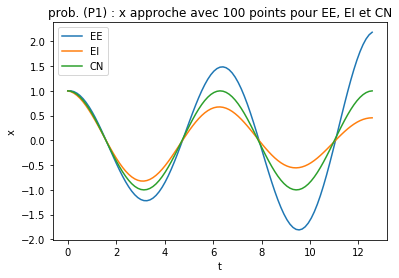

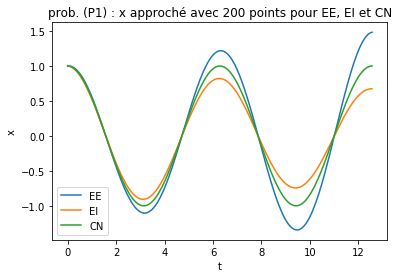

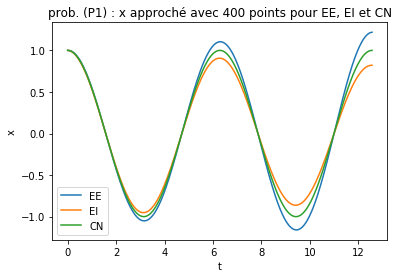

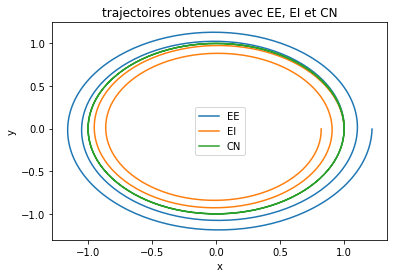

In [6]:
plt.figure(11)
plt.plot(Tee,Yee[:,0],label='EE')
plt.plot(Tei,Yei[:,0],label='EI')
plt.plot(TCN,YCN[:,0],label='CN')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('prob. (P1) : x approche avec 100 points pour EE, EI et CN')

h=tf/200

Tee, Yee=euler_exp(f1,t0,tf,Y0,h)
Tei, Yei=euler_imp(g_eul_imp_P1,t0,tf,Y0,h)
TCN, YCN=CN(g_CN_P1,t0,tf,Y0,h)


plt.figure(12)
plt.plot(Tee,Yee[:,0],label='EE')
plt.plot(Tei,Yei[:,0],label='EI')
plt.plot(TCN,YCN[:,0],label='CN')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('prob. (P1) : x approché avec 200 points pour EE, EI et CN')


h=tf/400

Tee, Yee=euler_exp(f1,t0,tf,Y0,h)
Tei, Yei=euler_imp(g_eul_imp_P1,t0,tf,Y0,h)
TCN, YCN=CN(g_CN_P1,t0,tf,Y0,h)


plt.figure(13)
plt.plot(Tee,Yee[:,0],label='EE')
plt.plot(Tei,Yei[:,0],label='EI')
plt.plot(TCN,YCN[:,0],label='CN')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('prob. (P1) : x approché avec 400 points pour EE, EI et CN')

plt.figure(14)
plt.plot(Yee[:,0],Yee[:,1],label='EE')
plt.plot(Yei[:,0],Yei[:,1],label='EI')
plt.plot(YCN[:,0],YCN[:,1],label='CN')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('trajectoires obtenues avec EE, EI et CN')



**Q4)** Donner la solution analytique de $(P_1)$ et la comparer avec les solutions approchées.

> **Réponse:** 
$$x=cos(t),\; y=sin(t)$$

Text(0.5,1,'prob. (P4) : x exacte et x approché avec 400 points pour EE, EI et CN')

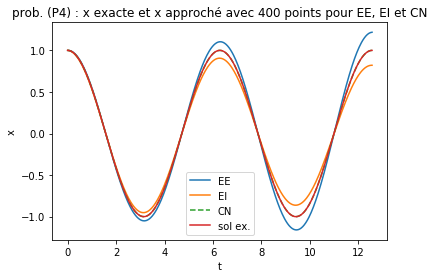

In [7]:
# Graphique comparant la solution exacte et les solutions approchées obtenues avec 400 points :

vect=np.linspace(t0,tf,1000)

plt.figure(15)
plt.plot(Tee,Yee[:,0],label='EE')
plt.plot(Tei,Yei[:,0],label='EI')
plt.plot(TCN,YCN[:,0],'--',label='CN')
plt.plot(vect,np.cos(vect),label='sol ex.')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('prob. (P4) : x exacte et x approché avec 400 points pour EE, EI et CN')

# COMMENTAIRE :
# La courbe de la solution exacte semble se confondre avec la courbe de la solution approchée par la méthode de Crank-Nicolson, alors que les solutions approchées obtenues par les méthodes d'Euler sont moins précises. C'est normal car CN est une méthode d'ordre 2 alors que les méthodes d'Euler sont d'ordre 1.




### Exercice 2 : Méthodes d'ordre supérieur.

**Problèmes raides**

Nous nous intéressons ici au cas des problèmes *raides* suivants :

- Le problème
$$
(P_2)\ \ \ \ 
\begin{cases}
y'(t)  =   -100 y(t) + 10 t  + 1/10,  \\
y(0)  =   1/10,   
\end{cases}
$$
dont la solution exacte est donnée par
$$
y(t) = \frac{t+e^{-100 t}}{10}.
$$
On prendra l'intervalle $[0,0.5]$ et un pas $h=0.01$ dans les tests numériques.

- Le modèle de Van Der Pol 
$$
(P_3)\ \ \ \ 
\begin{cases}
y''(t)  =    (a-y(t)^2) y'(t) - y(t),\\
y(0)  =   \frac{1}{10},\ \ y'(0)  = 1,  
\end{cases}
$$
qui n'a pas de solution analytique, autrement dit dont la solution on ne sait pas calculer, même si elle existe (c'est une conséquence du théorème de Cauchy-Lipschitz). On prendra $a=5$ ou $a=8$, $[t_0,t_f] =[0, 20]$ dans les tests numériques.

**Remarque :** il n'est pas simple de définir ce que c'est une équation **raide**. Il s'agit d'équations dont les solutions présentent de grandes variations initiales ou de systèmes d'équations où les échelles de variation des différentes inconnues sont très différentes. Il s'agit d'équations qui sont en général difficiles d'approcher avec des schémas explicites d'ordre bas

**Q1)** À l'image de ce que vous avez fait pour les schémas d'Euler explicite et de Heun dans le TP3, écrire une fonction python de la forme `RK4(fct, t0, tf, y0, h)` pour le schéma de Runge-Kutta 4.

In [8]:

def RK4(f,t0,tf,y0,h):
    T=np.arange(t0,tf+h,h)
    N=T.size
    y=np.zeros((N,y0.size))
    y[0,:]=y0
    for n in range(N-1):
        p1=f(y[n,:],T[n])
        p2=f(y[n,:]+h*p1/2,T[n]+h/2)
        p3=f(y[n,:]+h*p2/2,T[n]+h/2)
        p4=f(y[n,:]+h*p3,T[n]+h)
        y[n+1,:]=y[n,:]+h*(p1+2*p2+2*p3+p4)/6
    return T,y



**Q2)** Testez les différents schémas explicites (Euler, Heun et RK4) sur le système $P_2$. Que constatez-vous ?

Text(0.5,1,'(P2) : sol. ex. et sol. approchées par E. exp, Heun et RK4')

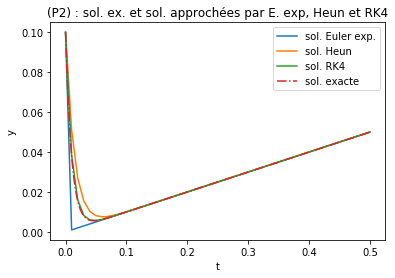

In [12]:

def f2(y,t):
    return -100*y+10*t+0.1

def u2(t):
    return (t+np.exp(-100.*t))/10

def Heun(f,t0,tf,y0,h):
    T=np.arange(t0,tf+h,h)
    N=T.size
    y=np.zeros((N,y0.size))
    y[0,:]=y0
    for n in range(N-1):
        p1=f(y[n,:],T[n])
        p2=f(y[n,:]+h*p1,T[n+1])
        y[n+1,:]=y[n,:]+h*(p1+p2)/2
    return T,y

t0=0
tf=0.5
h=0.01
y0=np.array([1./10])
vect=np.linspace(t0,tf,1001)

TEE,yEE=euler_exp(f2,t0,tf,y0,h)
TH,yH=Heun(f2,t0,tf,y0,h)
TRK4,yRK4=RK4(f2,t0,tf,y0,h)

plt.figure(16)
plt.plot(TEE, yEE,label='sol. Euler exp.')
plt.plot(TH, yH,label='sol. Heun')
plt.plot(TRK4, yRK4,label='sol. RK4')
plt.plot(vect,u2(vect),'-.',label='sol. exacte')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('(P2) : sol. ex. et sol. approchées par E. exp, Heun et RK4')

# COMMENTAIRE :
# Avec ce pas aucun schéma ne donne une très bonne approximation mais RK4 est le meilleur.
#Il s'agit d'un schéma d'ordre 4. Ce problème montre que dans un cadre raide même un schéma d'ordre élevé 
#a besoin d'un pas petit pour bien approcher. On peut diminuer le pas et voir que l'approximation est meilleure 
#pour les 3 schémas. Ce problème n'est pas très raide.






Afin de voir le comportement de ces schémas face à un problème plus raide que le précédent, on résout l'équation  de Van der Pol $(P_3)$. Il s'agit d'un problème non linéaire qui n'a pas de solution analytique, il doit alors être résolu numériquement. 

**Q3)** Écrivez $(P_3)$ sous la forme d'un syst\`eme différentiel de deux équations  d'ordre 1. 

> **Réponse:** 

Le système s'écrit $Y'=F(t,Y)$, avec $Y=(y,y')$ et $F(t,Y)=(y',(a-y^2)y'-y)$

**Q4)** Quels schémas donnent les meilleurs résultats lorsque l'on prend $a=8$, $t \in [0, 20]$ et $h=0.1,\, 0.05,\, 0.025$ ? Tester tous les schémas explicites proposés.

/Users/nenna/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nenna/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in add
/Users/nenna/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in add


Text(0.5,1,'(P3) : sol. approchées par E. exp, Heun et RK4 h=0.025')

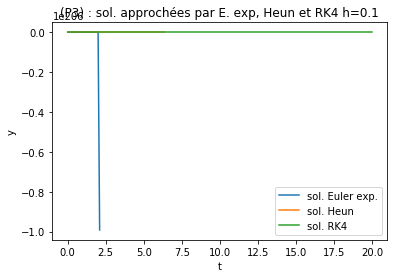

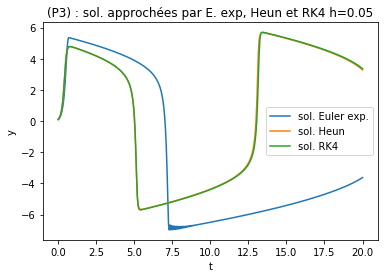

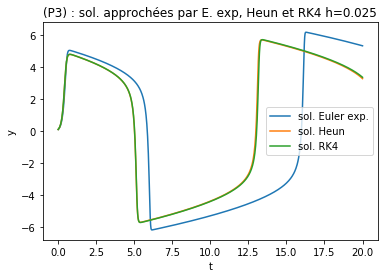

In [18]:
def f3(y,t,a=8):
    return np.array([y[1],(a-y[0]**2)*y[1]-y[0]])
t0=0
tf=20

y0=np.array([1./10,1])

h=0.1

TEE,yEE=euler_exp(f3,t0,tf,y0,h)
TH,yH=Heun(f3,t0,tf,y0,h)
TRK4,yRK4=RK4(f3,t0,tf,y0,h)

plt.figure(17)
plt.plot(TEE, yEE[:,0],label='sol. Euler exp.')
plt.plot(TH, yH[:,0],label='sol. Heun')
plt.plot(TRK4, yRK4[:,0],label='sol. RK4')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('(P3) : sol. approchées par E. exp, Heun et RK4 h=0.1')

h=0.05

TEE,yEE=euler_exp(f3,t0,tf,y0,h)
TH,yH=Heun(f3,t0,tf,y0,h)
TRK4,yRK4=RK4(f3,t0,tf,y0,h)

plt.figure(18)
plt.plot(TEE, yEE[:,0],label='sol. Euler exp.')
plt.plot(TH, yH[:,0],label='sol. Heun')
plt.plot(TRK4, yRK4[:,0],label='sol. RK4')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('(P3) : sol. approchées par E. exp, Heun et RK4 h=0.05')

h=0.025

TEE,yEE=euler_exp(f3,t0,tf,y0,h)
TH,yH=Heun(f3,t0,tf,y0,h)
TRK4,yRK4=RK4(f3,t0,tf,y0,h)

plt.figure(19)
plt.plot(TEE, yEE[:,0],label='sol. Euler exp.')
plt.plot(TH, yH[:,0],label='sol. Heun')
plt.plot(TRK4, yRK4[:,0],label='sol. RK4')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('(P3) : sol. approchées par E. exp, Heun et RK4 h=0.025')

# COMMENTAIRE :
# pour le plus grand pas, l'approximation explose, au moins pour Euler explicite. 
#Lorsque l'on diminue le pas, RK4 et Heun semble converger vers la même solution. 
#Ici on ne connaît pas la solution exacte mais le fait que 2 schémas différents semblent approcher 
#la même fonction c'est une bonne indication.




**Q5)** Recommencez avec \(a=5\).

/Users/nenna/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nenna/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in add


Text(0.5,1,'(P3) : sol. approchées par E. exp, Heun et RK4 h=0.025')

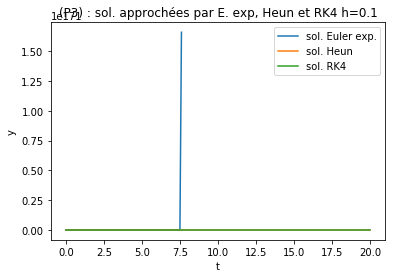

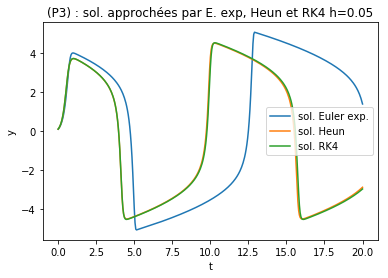

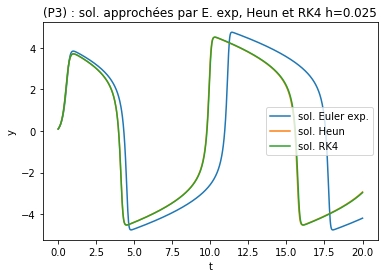

In [19]:
f3b=lambda y,t : f3(y,t,5)

h=0.1

TEE,yEE=euler_exp(f3b,t0,tf,y0,h)
TH,yH=Heun(f3b,t0,tf,y0,h)
TRK4,yRK4=RK4(f3b,t0,tf,y0,h)

plt.figure(20)
plt.plot(TEE, yEE[:,0],label='sol. Euler exp.')
plt.plot(TH, yH[:,0],label='sol. Heun')
plt.plot(TRK4, yRK4[:,0],label='sol. RK4')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('(P3) : sol. approchées par E. exp, Heun et RK4 h=0.1')

h=0.05

TEE,yEE=euler_exp(f3b,t0,tf,y0,h)
TH,yH=Heun(f3b,t0,tf,y0,h)
TRK4,yRK4=RK4(f3b,t0,tf,y0,h)

plt.figure(21)
plt.plot(TEE, yEE[:,0],label='sol. Euler exp.')
plt.plot(TH, yH[:,0],label='sol. Heun')
plt.plot(TRK4, yRK4[:,0],label='sol. RK4')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('(P3) : sol. approchées par E. exp, Heun et RK4 h=0.05')

h=0.025

TEE,yEE=euler_exp(f3b,t0,tf,y0,h)
TH,yH=Heun(f3b,t0,tf,y0,h)
TRK4,yRK4=RK4(f3b,t0,tf,y0,h)

plt.figure(22)
plt.plot(TEE, yEE[:,0],label='sol. Euler exp.')
plt.plot(TH, yH[:,0],label='sol. Heun')
plt.plot(TRK4, yRK4[:,0],label='sol. RK4')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('(P3) : sol. approchées par E. exp, Heun et RK4 h=0.025')



